In [154]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_datasets as tfds

In [163]:
# function for building VResNet Block
def build_ResNet_block(input_layer, num_cnn=2,stage_num=2, channel=64, is_50=False, block_num = 1):
    x = input_layer
    short = x
    if not is_50:
        for cnn_num in range(num_cnn):
                x = keras.layers.Conv2D(
                                        filters=channel,
                                        kernel_size=(3, 3),
                                        activation = 'relu',
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv1'
                                        )(x)
        #x = keras.layers.Add()([x, short])
        x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn1')(x)
                

        
    else:
        print("Restnet 50")
    return x
'''
def build_ResNet_block(input_layer,
                    num_cnn=3, 
                    channel=64,
                    block_num=1,
                   ):
    # 입력 레이어
    #x = keras.layers.ZeroPadding2D(padding=(3, 3))(input_layer)
    x = keras.layers.Conv2D(64, (7, 7), strides=(2, 2))(input_layer)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    #x = keras.layers.ZeroPadding2D(padding=(1,1))(x)
    # Max Pooling 레이어
    x = keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2,
        name=f'block{block_num}_pooling'
    )(x)
    
    # CNN 레이어
    for cnn_num in range(num_cnn):
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}'
        )(x)    
        
    x = keras.layers.BatchNormalization(axis = 3)(x)
    
    

    
    return x
'''

"\ndef build_ResNet_block(input_layer,\n                    num_cnn=3, \n                    channel=64,\n                    block_num=1,\n                   ):\n    # 입력 레이어\n    #x = keras.layers.ZeroPadding2D(padding=(3, 3))(input_layer)\n    x = keras.layers.Conv2D(64, (7, 7), strides=(2, 2))(input_layer)\n    x = keras.layers.BatchNormalization()(x)\n    x = keras.layers.Activation('relu')(x)\n    #x = keras.layers.ZeroPadding2D(padding=(1,1))(x)\n    # Max Pooling 레이어\n    x = keras.layers.MaxPooling2D(\n        pool_size=(2, 2),\n        strides=2,\n        name=f'block{block_num}_pooling'\n    )(x)\n    \n    # CNN 레이어\n    for cnn_num in range(num_cnn):\n        x = keras.layers.Conv2D(\n            filters=channel,\n            kernel_size=(3,3),\n            activation='relu',\n            kernel_initializer='he_normal',\n            padding='same',\n            name=f'block{block_num}_conv{cnn_num}'\n        )(x)    \n        \n    x = keras.layers.BatchNormalization(axis 

In [164]:
ResNet_input_layer = keras.layers.Input(shape=(32,32,3))   # 입력 레이어 생성
ResNet_block_output = build_ResNet_block(ResNet_input_layer)    # VGG 블록 생성

In [165]:
# 블록 1개짜리 model 생성
model = keras.Model(inputs=ResNet_input_layer, outputs=ResNet_block_output)  

model.summary()

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_62 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
stage2_1_conv1 (Conv2D)      (None, 32, 32, 64)        1792      
_________________________________________________________________
stage2_2_conv1 (Conv2D)      (None, 32, 32, 64)        36928     
_________________________________________________________________
stage2_2_bn1 (BatchNormaliza (None, 32, 32, 64)        256       
Total params: 38,976
Trainable params: 38,848
Non-trainable params: 128
_________________________________________________________________


## ResNet - 34

In [168]:
# VGG 모델 자체를 생성하는 함수입니다.
def build_resnet(input_shape=(224, 224, 3), is_50=False):
    num_cnn_ls = [3, 4, 6, 3]
    channel_ls = [64, 128, 256, 512]
    num_classes = 2
    input_layer = keras.layers.Input(shape=input_shape)
    x = input_layer
    x = keras.layers.Conv2D(filters = 64,
                            kernel_size=(7, 7),
                            strides=2,
                            kernel_initializer='he_normal',
                            padding='same',
                            name=f'conv2d_0',
                            activation = 'relu'
                            )(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.MaxPool2D(pool_size=(3,3), strides=2, padding='same', name=f'stage2_0_maxpooling')(x)
    output = x
    
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_ls, channel_ls)):
        output = build_ResNet_block(output,
                                    num_cnn=num_cnn,
                                    stage_num = i+2,
                                    channel=channel,
                                    is_50 = is_50,
                                    block_num = i
                                    )
    output = keras.layers.AveragePooling2D(pool_size = 1,
                                           padding='same',
                                           name='avg_pool')(output)
    output = keras.layers.Flatten(name='flatten_6')(output)
    output = keras.layers.Dense(num_classes, activation='softmax',name='predictions')(output)
    model = keras.Model(inputs=input_layer, outputs=output)
    return model
'''
def build_resnet(input_shape=(32,32,3),
              num_cnn_list=[3,4,6,3],
              channel_list=[64,128,256,512],
              num_classes=10,
              is_50 = False):
    
    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.
    
    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.
    output = input_layer
    
    # config list들의 길이만큼 반복해서 블록을 생성합니다.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_ResNet_block(
            output,
            X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )
        
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model
'''

"\ndef build_resnet(input_shape=(32,32,3),\n              num_cnn_list=[3,4,6,3],\n              channel_list=[64,128,256,512],\n              num_classes=10,\n              is_50 = False):\n    \n    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.\n    \n    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.\n    output = input_layer\n    \n    # config list들의 길이만큼 반복해서 블록을 생성합니다.\n    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):\n        output = build_ResNet_block(\n            output,\n            X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)\n            num_cnn=num_cnn, \n            channel=channel,\n            block_num=i\n        )\n        \n    output = keras.layers.Flatten(name='flatten')(output)\n    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output)\n    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)\n    output = keras.laye

In [169]:
resnet_34 = build_resnet(input_shape=(32, 32,3), is_50=False)
resnet_34.summary()

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_64 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 16, 16, 64)        9472      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
stage2_0_maxpooling (MaxPool (None, 8, 8, 64)          0         
_________________________________________________________________
stage2_1_conv1 (Conv2D)      (None, 8, 8, 64)          36928     
_________________________________________________________________
stage2_2_conv1 (Conv2D)      (None, 8, 8, 64)          36928     
_________________________________________________________________
stage2_3_conv1 (Conv2D)      (None, 8, 8, 64)          369

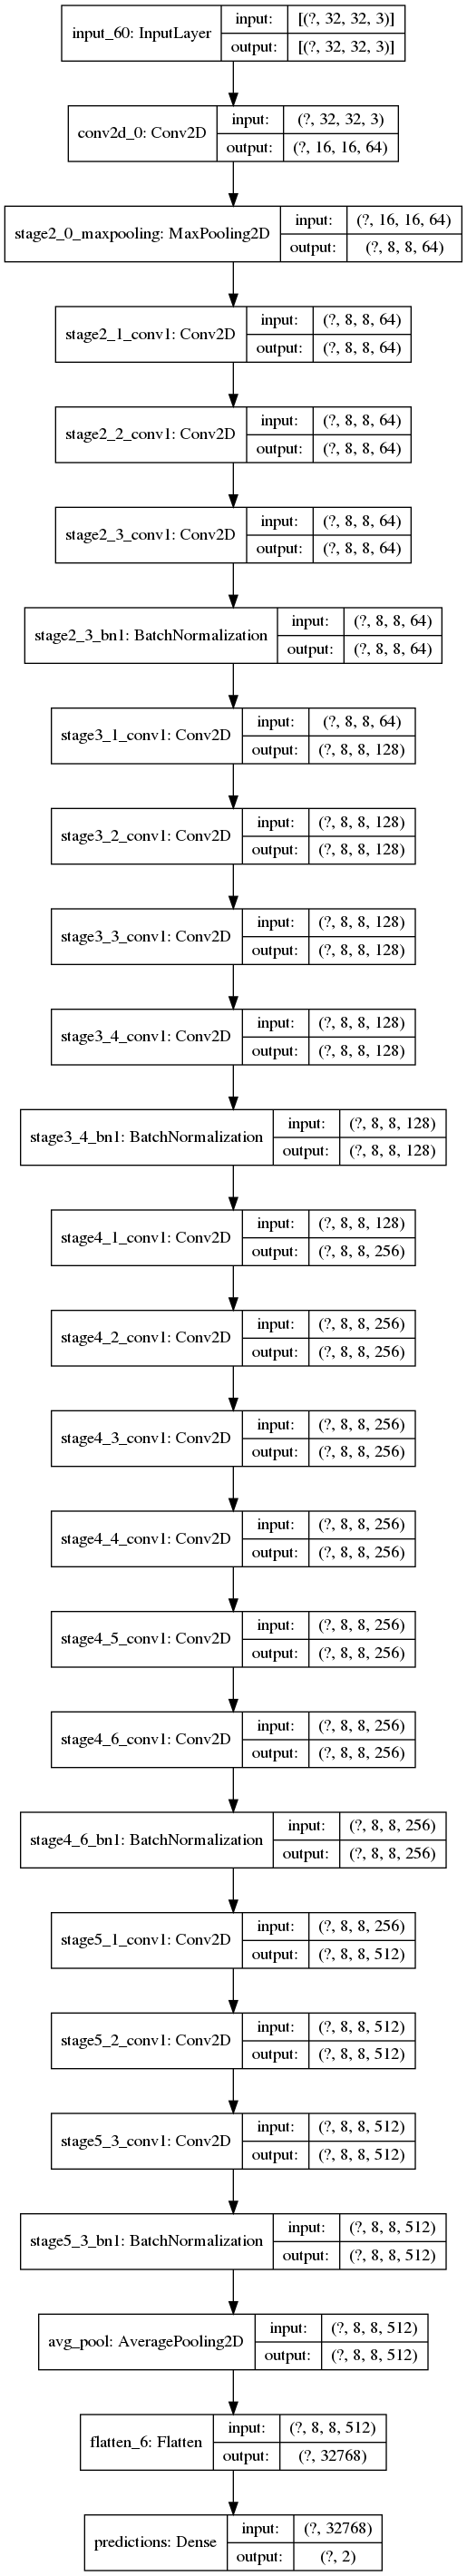

In [160]:
keras.utils.plot_model(resnet_34, "resnet_34.png", show_shapes=True)

In [80]:
'''
build_plaingnet()을 만들기 위한 백업 코드
'''
# function for building VResNet Block
def build_ResNet_block(input_layer ,num_cnn=2,stage_num=2, channel=64, is_50=False, is_plain=True):
    x = input_layer
    short = x
    if not is_50:
        for cnn_num in range(num_cnn):
            if cnn_num == 0:
                if stage_num == 2:
                    stride = 1
                else:
                    stride = 2
                    
                x = keras.layers.Conv2D(filters=channel,
                                        kernel_size=(3, 3),
                                        padding='same',
                                        strides=stride,
                                        name=f'stage{stage_num}_{cnn_num+1}_conv1',
                                        )(x)
                x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn1')(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(filters=channel,
                                        kernel_size=(3, 3),
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv2',
                                        )(x)
                x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn2')(x)
                
                if is_plain == False:
                    short = keras.layers.Conv2D(filters=channel,
                                                kernel_size=(1, 1),
                                                strides=stride,
                                                padding='same',
                                                name=f'stage{stage_num}_{cnn_num+1}_short',
                                                )(short)
                    short = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn3')(short)
                    x = keras.layers.Add()([x, short])
                    
                x = keras.layers.Activation('relu')(x)
                short = x
            else:
                x = keras.layers.Conv2D(filters=channel,
                                        kernel_size=(3, 3),
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv1',
                                        )(x)
                x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn1')(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(filters=channel,
                                        kernel_size=(3, 3),
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv2',
                                        )(x)
                x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn2')(x)
                if is_plain == False:
                    x = keras.layers.Add()([x, short])
                x = keras.layers.Activation('relu')(x)
                short = x
    else:
        for cnn_num in range(num_cnn):
            if cnn_num == 0:
                if stage_num == 2:
                    stride = 1
                else:
                    stride = 2
                x = keras.layers.Conv2D(filters=channel,
                                        kernel_size=(1, 1),
                                        strides = stride,
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv1',
                                       )(x)
                x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn1')(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(filters=channel,
                                        kernel_size=(3, 3),
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv2',
                                       )(x)
                x = keras.layers.BatchNormalization(name=f'stae{stage_num}_{cnn_num+1}_bn2')(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(filters=channel*4,
                                        kernel_size=(1, 1),
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv3',
                                       )(x)
                x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn3')(x)
                if is_plain == False:
                    short = keras.layers.Conv2D(filters=channel*4,
                                                kernel_size=(1, 1),
                                                strides=stride,
                                                padding='same',
                                                name=f'stage{stage_num}_{cnn_num+1}_short',
                                                )(short)
                    short = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn4')(short)
                    x = keras.layers.Add()([x, short])
                x = keras.layers.Activation('relu')(x)
                short = x
            else:
                x = keras.layers.Conv2D(filters=channel,
                                        kernel_size=(1, 1),
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv1',
                                       )(x)
                x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn1')(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(filters=channel,
                                        kernel_size=(3, 3),
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv2',
                                       )(x)
                x = keras.layers.BatchNormalization(name=f'stae{stage_num}_{cnn_num+1}_bn2')(x)
                x = keras.layers.Activation('relu')(x)
                x = keras.layers.Conv2D(filters=channel*4,
                                        kernel_size=(1, 1),
                                        padding='same',
                                        name=f'stage{stage_num}_{cnn_num+1}_conv3',
                                       )(x)
                x = keras.layers.BatchNormalization(name=f'stage{stage_num}_{cnn_num+1}_bn3')(x)
                if is_plain == False:
                    x = keras.layers.Add()([x, short])
                x = keras.layers.Activation('relu')(x)
                short = x
    return x
'''
def build_ResNet_block(input_layer,
                    num_cnn=3, 
                    channel=64,
                    block_num=1,
                   ):
    # 입력 레이어
    #x = keras.layers.ZeroPadding2D(padding=(3, 3))(input_layer)
    x = keras.layers.Conv2D(64, (7, 7), strides=(2, 2))(input_layer)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Activation('relu')(x)
    #x = keras.layers.ZeroPadding2D(padding=(1,1))(x)
    # Max Pooling 레이어
    x = keras.layers.MaxPooling2D(
        pool_size=(2, 2),
        strides=2,
        name=f'block{block_num}_pooling'
    )(x)
    
    # CNN 레이어
    for cnn_num in range(num_cnn):
        x = keras.layers.Conv2D(
            filters=channel,
            kernel_size=(3,3),
            activation='relu',
            kernel_initializer='he_normal',
            padding='same',
            name=f'block{block_num}_conv{cnn_num}'
        )(x)    
        
    x = keras.layers.BatchNormalization(axis = 3)(x)
    
    

    
    return x
'''

"\ndef build_ResNet_block(input_layer,\n                    num_cnn=3, \n                    channel=64,\n                    block_num=1,\n                   ):\n    # 입력 레이어\n    #x = keras.layers.ZeroPadding2D(padding=(3, 3))(input_layer)\n    x = keras.layers.Conv2D(64, (7, 7), strides=(2, 2))(input_layer)\n    x = keras.layers.BatchNormalization()(x)\n    x = keras.layers.Activation('relu')(x)\n    #x = keras.layers.ZeroPadding2D(padding=(1,1))(x)\n    # Max Pooling 레이어\n    x = keras.layers.MaxPooling2D(\n        pool_size=(2, 2),\n        strides=2,\n        name=f'block{block_num}_pooling'\n    )(x)\n    \n    # CNN 레이어\n    for cnn_num in range(num_cnn):\n        x = keras.layers.Conv2D(\n            filters=channel,\n            kernel_size=(3,3),\n            activation='relu',\n            kernel_initializer='he_normal',\n            padding='same',\n            name=f'block{block_num}_conv{cnn_num}'\n        )(x)    \n        \n    x = keras.layers.BatchNormalization(axis 

In [81]:
# VGG 모델 자체를 생성하는 함수입니다.
def build_resnet(input_shape=(224, 224, 3), is_50=False, is_plain=True):
    num_cnn_ls = [3, 4, 6, 3]
    channel_ls = [64, 128, 256, 512]
    num_classes = 2
    input_layer = keras.layers.Input(shape=input_shape)
    x = input_layer
    x = keras.layers.Conv2D(filters = 64,
                            kernel_size=(7, 7),
                            strides=2,
                            kernel_initializer='he_normal',
                            padding='same',
                            name=f'conv2d_0',
                            )(x)
    x = keras.layers.BatchNormalization(name=f'batch_normalization_0')(x)
    x = keras.layers.Activation('relu', name=f'activation_0')(x)
    x = keras.layers.MaxPool2D(pool_size=(3,3), strides=2, padding='same', name=f'stage2_0_maxpooling')(x)
    output = x
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_ls, channel_ls)):
        output = build_ResNet_block(output,
                                    num_cnn=num_cnn,
                                    stage_num = i+2,
                                    channel=channel,
                                    is_50 = is_50,
                                    is_plain = is_plain,
                                    )
    output = keras.layers.AveragePooling2D(pool_size = 1,
                                           padding='same',
                                           name='avg_pool')(output)
    output = keras.layers.Flatten(name='flatten_6')(output)
    output = keras.layers.Dense(num_classes, activation='softmax',name='predictions')(output)
    model = keras.Model(inputs=input_layer, outputs=output)
    return model
'''
def build_resnet(input_shape=(32,32,3),
              num_cnn_list=[3,4,6,3],
              channel_list=[64,128,256,512],
              num_classes=10,
              is_50 = False):
    
    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.
    
    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.
    output = input_layer
    
    # config list들의 길이만큼 반복해서 블록을 생성합니다.
    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):
        output = build_ResNet_block(
            output,
            num_cnn=num_cnn, 
            channel=channel,
            block_num=i
        )
        
    output = keras.layers.Flatten(name='flatten')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output)
    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)
    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(output)
    
    model = keras.Model(
        inputs=input_layer, 
        outputs=output
    )
    return model
'''

"\ndef build_resnet(input_shape=(32,32,3),\n              num_cnn_list=[3,4,6,3],\n              channel_list=[64,128,256,512],\n              num_classes=10,\n              is_50 = False):\n    \n    assert len(num_cnn_list) == len(channel_list) #모델을 만들기 전에 config list들이 같은 길이인지 확인합니다.\n    \n    input_layer = keras.layers.Input(shape=input_shape)  # input layer를 만들어둡니다.\n    output = input_layer\n    \n    # config list들의 길이만큼 반복해서 블록을 생성합니다.\n    for i, (num_cnn, channel) in enumerate(zip(num_cnn_list, channel_list)):\n        output = build_ResNet_block(\n            output,\n            num_cnn=num_cnn, \n            channel=channel,\n            block_num=i\n        )\n        \n    output = keras.layers.Flatten(name='flatten')(output)\n    output = keras.layers.Dense(4096, activation='relu', name='fc1')(output)\n    output = keras.layers.Dense(4096, activation='relu', name='fc2')(output)\n    output = keras.layers.Dense(num_classes, activation='softmax', name='predictions')(outp

In [82]:
resnet_34 = build_resnet(input_shape=(32, 32,3), is_50=False)
resnet_34.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_0 (Conv2D)            (None, 16, 16, 64)        9472      
_________________________________________________________________
batch_normalization_0 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
activation_0 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
stage2_0_maxpooling (MaxPool (None, 8, 8, 64)          0         
_________________________________________________________________
stage2_1_conv1 (Conv2D)      (None, 8, 8, 64)          36928     
_________________________________________________________________
stage2_1_bn1 (BatchNormaliza (None, 8, 8, 64)          256